In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
bc = pd.read_csv('breastCancer.csv')

Before implementing any feature selection, it is necessary to look into the data

In [4]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Diagnosis column can be considered as target variable.Here we can see that the first column i.e id and the last column i.e. unnamed doesnot add any value to the data. Now we will first drop the unwanted columns.

In [5]:
bc_col=bc.columns
print(bc_col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
Y=bc['diagnosis']
bc=bc.drop(['id','Unnamed: 32','diagnosis'],axis=1)

In [7]:
bc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now lets plot the count of Malignant and Benign cases

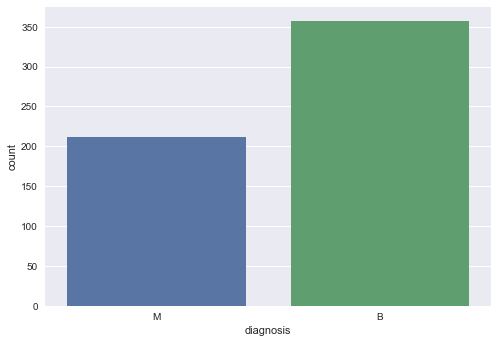

Number of Benign:  357
Number of Malignant :  212


In [8]:
ax = sns.countplot(Y,label="Count")    
plt.show()# M = 212, B = 357
B, M = Y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [9]:
sns.countplot(Y,label='Count')


In [10]:
B, M = Y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


# Visualisation

In [23]:
bc.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

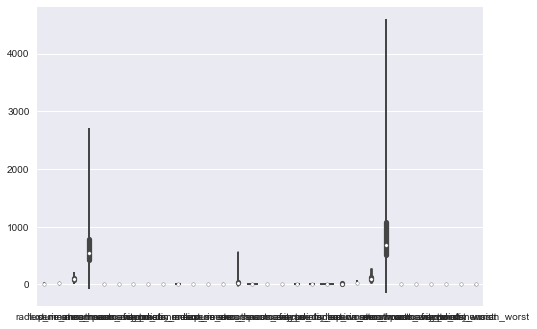

In [35]:
sns.violinplot(data=bc)
plt.show()

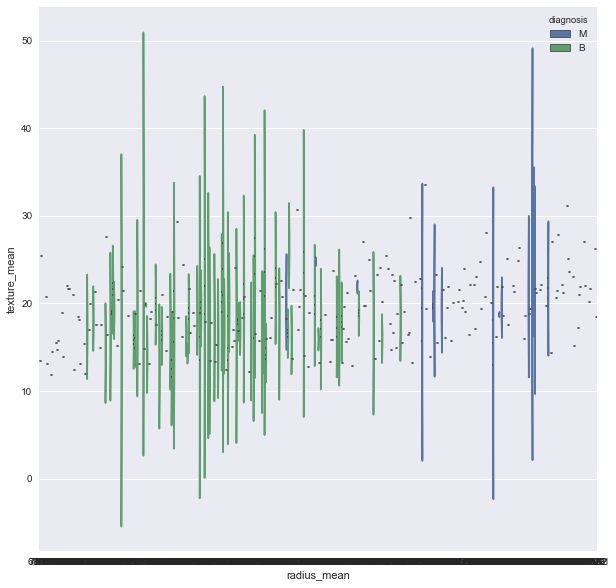

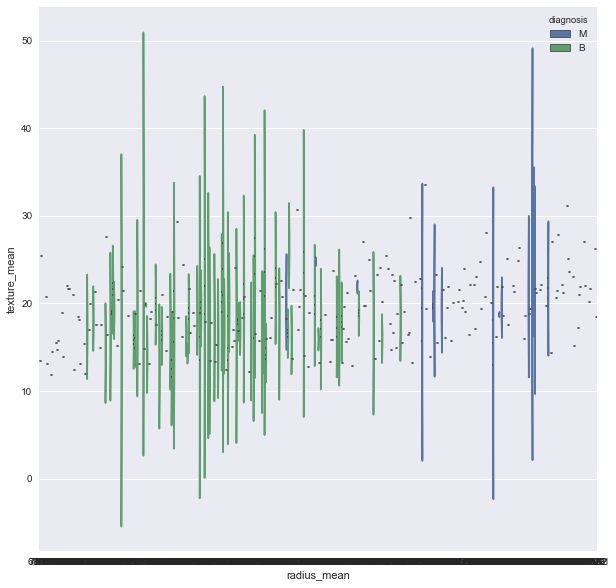

In [29]:
data_dia = Y
data = bc.iloc[:,:]
data=pd.concat([data_dia,data],axis=1)
plt.figure(figsize=(10,10))
sns.violinplot(x="radius_mean", y="texture_mean", hue="diagnosis", data=data,split=True, inner="quart")
plt.show()

In [45]:
data_dia = Y
data =  bc.iloc[:,:]
data_n_2 = (data - data.mean()) / (data.std())              # standardization


In [49]:
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
print(data)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M     1.096100     -2.071512        1.268817   0.983510   
1           M     1.828212     -0.353322        1.684473   1.907030   
2           M     1.578499      0.455786        1.565126   1.557513   
3           M    -0.768233      0.253509       -0.592166  -0.763792   
4           M     1.748758     -1.150804        1.775011   1.824624   
5           M    -0.475956     -0.834601       -0.386808  -0.505206   
6           M     1.169878      0.160508        1.137124   1.094332   
7           M    -0.118413      0.358135       -0.072803  -0.218772   
8           M    -0.319885      0.588312       -0.183919  -0.383870   
9           M    -0.473118      1.104467       -0.329192  -0.508616   
10          M     0.537083      0.918465        0.441622   0.406096   
11          M     0.468980     -0.325421        0.478661   0.358357   
12          M     1.430942      1.281168        1.663896   1.330185   
13    

In [50]:
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
print(data)

     diagnosis                features     value
0            M             radius_mean  1.096100
1            M             radius_mean  1.828212
2            M             radius_mean  1.578499
3            M             radius_mean -0.768233
4            M             radius_mean  1.748758
5            M             radius_mean -0.475956
6            M             radius_mean  1.169878
7            M             radius_mean -0.118413
8            M             radius_mean -0.319885
9            M             radius_mean -0.473118
10           M             radius_mean  0.537083
11           M             radius_mean  0.468980
12           M             radius_mean  1.430942
13           M             radius_mean  0.488843
14           M             radius_mean -0.112737
15           M             radius_mean  0.117112
16           M             radius_mean  0.156839
17           M             radius_mean  0.568298
18           M             radius_mean  1.612551
19           B      

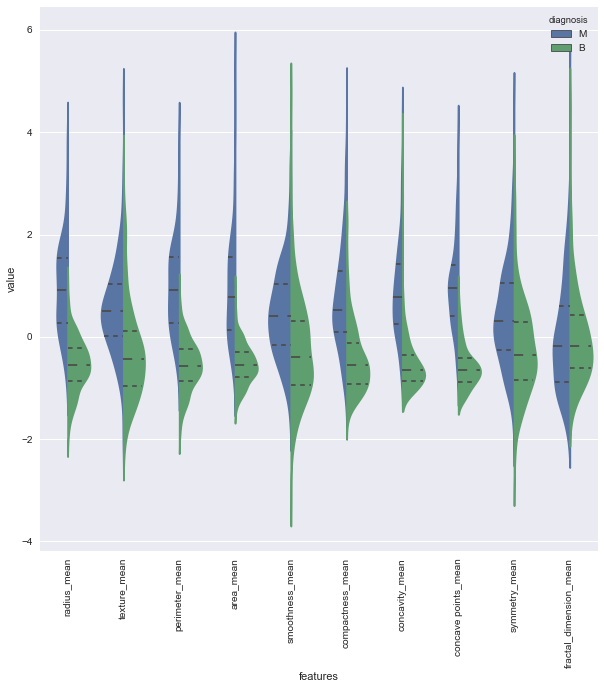

In [51]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

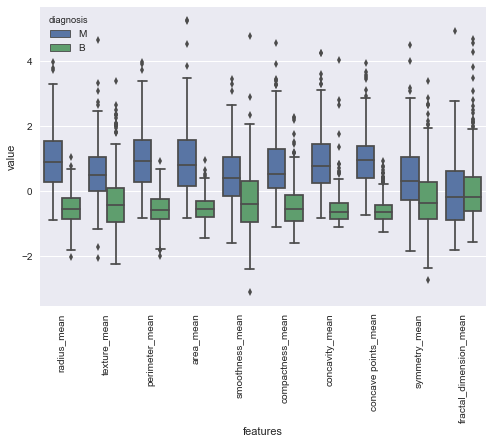

In [56]:

sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

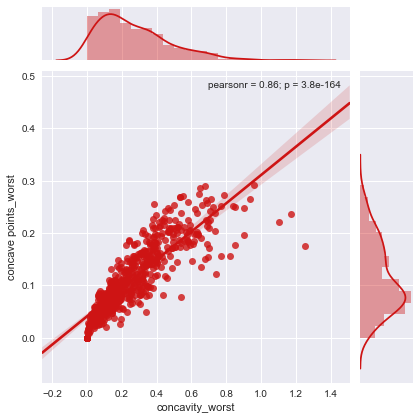

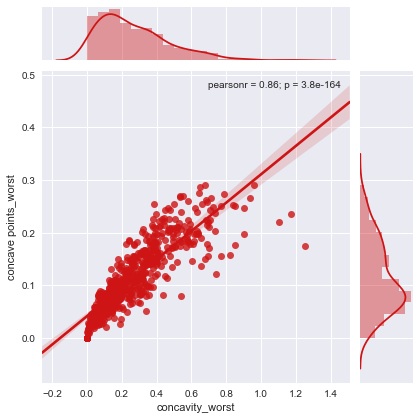

In [58]:
sns.jointplot(bc.loc[:,'concavity_worst'], bc.loc[:,'concave points_worst'], kind="regg", color="#ce1414")
plt.show()

C:\Users\Shreya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


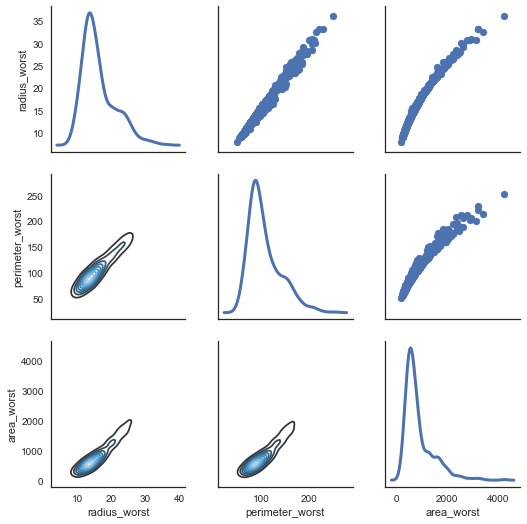

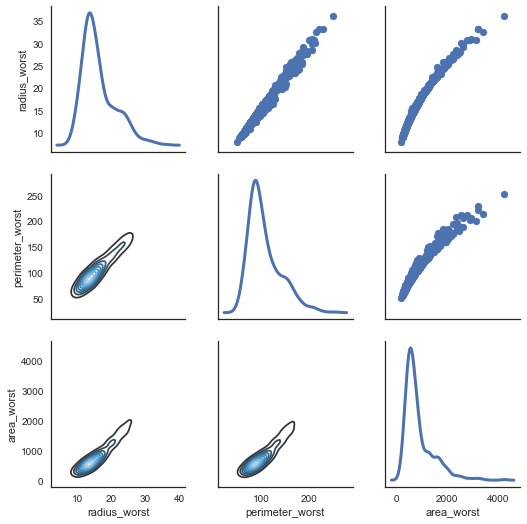

In [60]:
sns.set(style="white")
df = bc.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

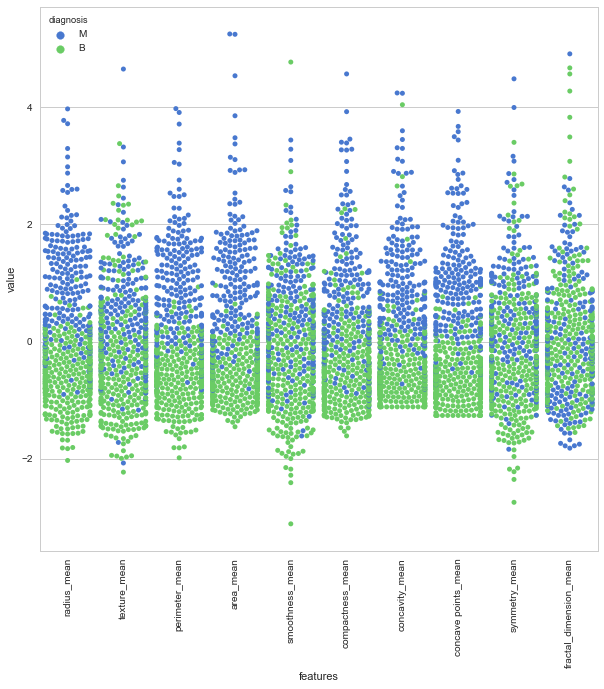

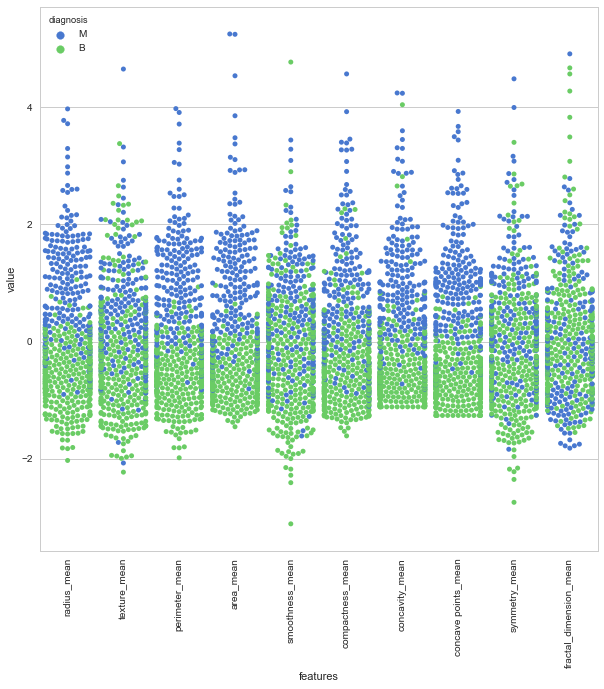

In [65]:
sns.set(style="whitegrid", palette="muted")
data_dia = Y
data = bc
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)
plt.show()

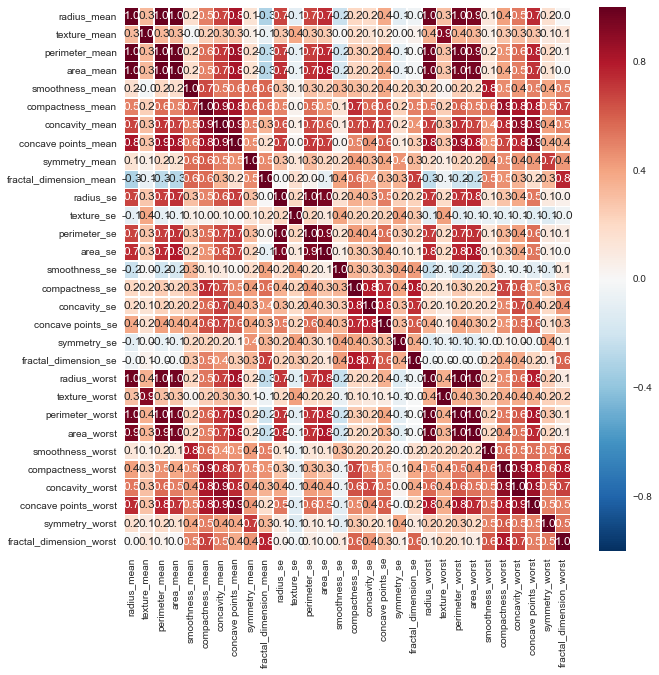

In [69]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(bc.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()